## Dados sobre a poluição de água

Grupo:

Nome: Carlos Eduardo Caramante Ribeiro / RM: 552159 <br>
Nome: Felipe Heilmann Marques / RM: 551025 <br>
Nome: Daniel Barbosa Mariano / RM: 551171 <br>

Aqui foi analizada a taxa de qualidade de água em multiplos países, organizada da seguinte maneira:

1. Ocorrências de cada pais na tabela
2. Cidades com mais ocorrências do pais do ponto anterior
3. Média da qualidade de ar por país
4. Média da poluição da água
5. Média das cidades com melhores médias dos dois

Uma pequena nota antes de começarmos, nestes gráficos, entendemos que a qualidade de ar (AirQuality) tem uma conotação positiva, dizendo quanto porcento do ar seria puro/bom, já a poluição de água (WaterPollution) tem uma conotação negativa, dizendo quanto da água está poluída.

In [ ]:
pip install scikit-learn

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
# Dados fornecidos
df = pd.read_csv("./Cities1.csv").head(20)

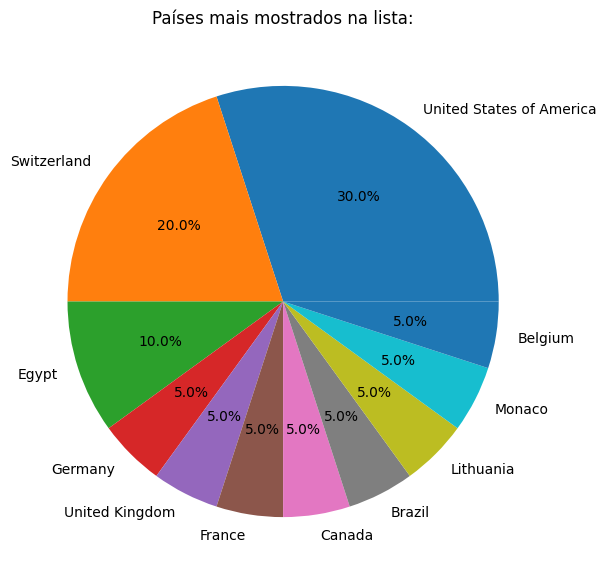

In [7]:
# Aqui contamos ocorrências de cada país
contagem_paises = df['Country'].value_counts()

# E usando essa contagem criamos um gráfico
plt.figure(figsize=(10, 7))
contagem_paises.plot(kind='pie', autopct='%1.1f%%',)
plt.title('Países mais mostrados na lista:')
plt.ylabel('')
plt.show()

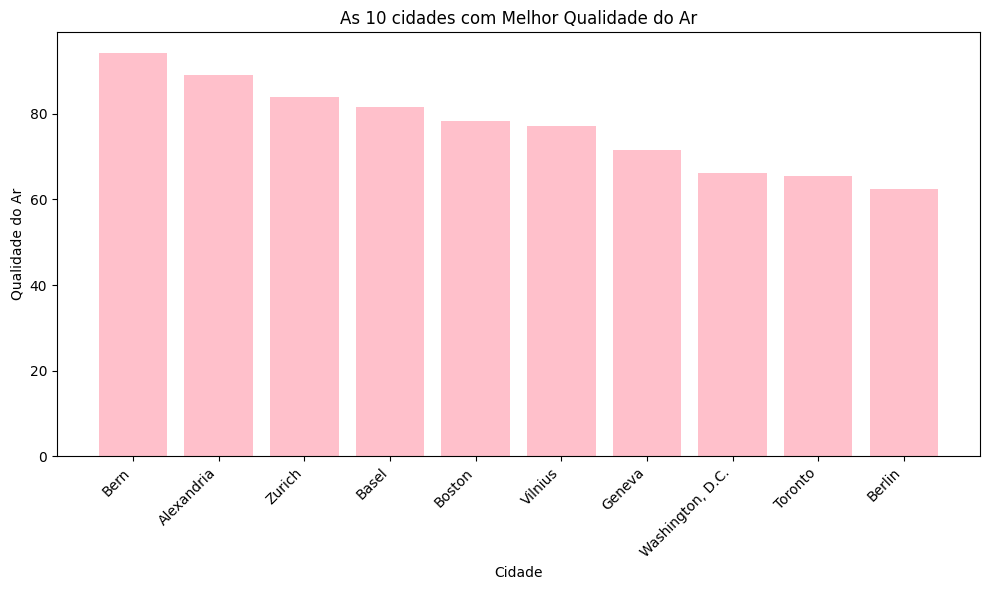

In [10]:
# Ordenar as cidades pela qualidade do ar em ordem decrescente
cidades = df.sort_values(by='AirQuality', ascending=False)

# Selecionar as cinco primeiras cidades com a melhor qualidade do ar
melhores_cidades = cidades.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(melhores_cidades['City'], melhores_cidades['AirQuality'], color =  'pink')
plt.xlabel('Cidade')
plt.ylabel('Qualidade do Ar')
plt.title('As 10 cidades com Melhor Qualidade do Ar')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

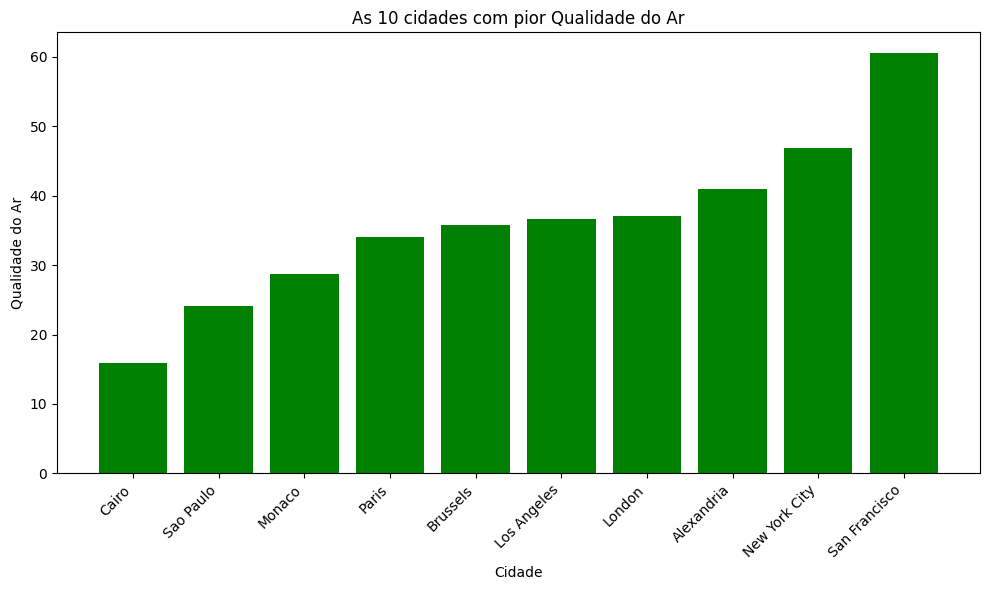

In [12]:
# Ordenar as cidades pela qualidade do ar em ordem decrescente
cidades = df.sort_values(by='AirQuality', ascending=True)

# Selecionar as cinco primeiras cidades com a melhor qualidade do ar
piores_cidades = cidades.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(piores_cidades['City'], piores_cidades['AirQuality'], color = 'green')
plt.xlabel('Cidade')
plt.ylabel('Qualidade do Ar')
plt.title('As 10 cidades com pior Qualidade do Ar')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

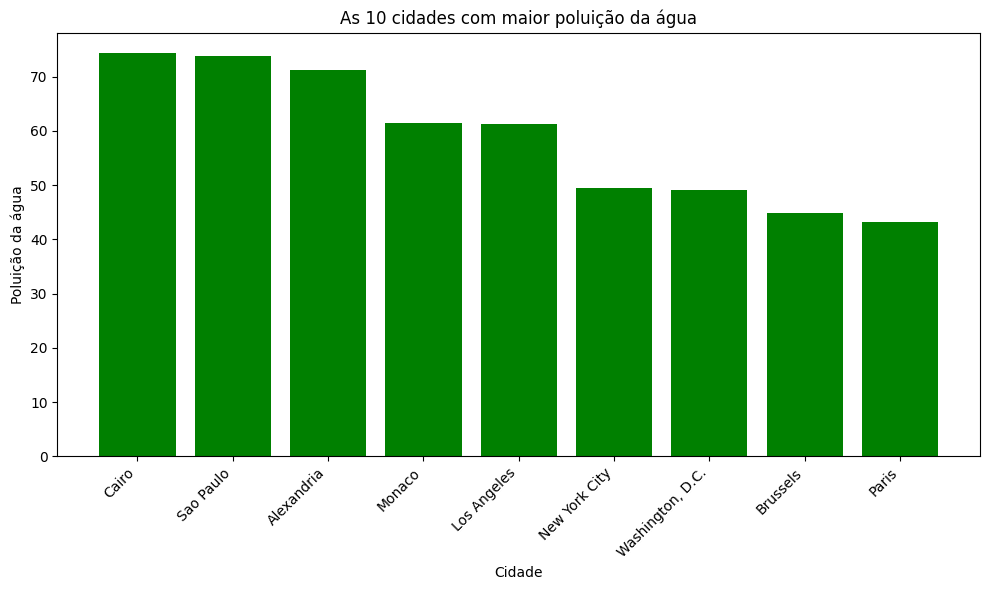

In [17]:
# Ordenar as cidades pela poluição da água em ordem crescente
cidades = df.sort_values(by='WaterPollution', ascending=False)

# Selecionar as cinco primeiras cidades pior poluição da água
piores_cidades_agua = cidades.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(piores_cidades_agua['City'], piores_cidades_agua['WaterPollution'], color = 'green')
plt.xlabel('Cidade')
plt.ylabel('Poluição da água')
plt.title('As 10 cidades com maior poluição da água')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

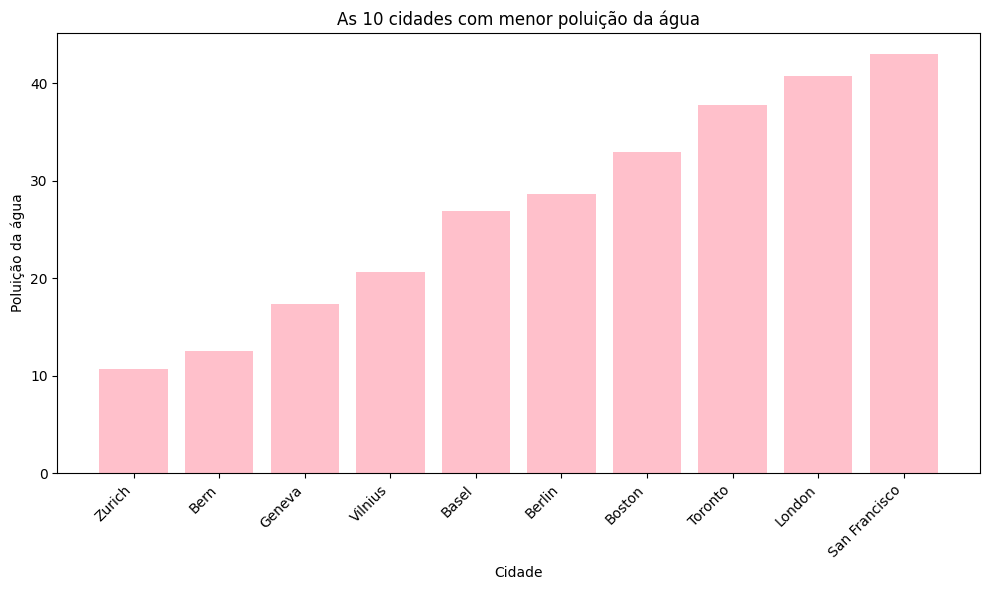

In [16]:
# Agora repetimos o código acima com uma pequena mudança para mostrar as cidades com menor poluição
cidades = df.sort_values(by='WaterPollution', ascending=True)

# Selecionar as cinco primeiras cidades pior poluição da água
melhores_cidades_agua = cidades.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(melhores_cidades_agua['City'], melhores_cidades_agua['WaterPollution'], color = 'pink')
plt.xlabel('Cidade')
plt.ylabel('Poluição da água')
plt.title('As 10 cidades com menor poluição da água')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

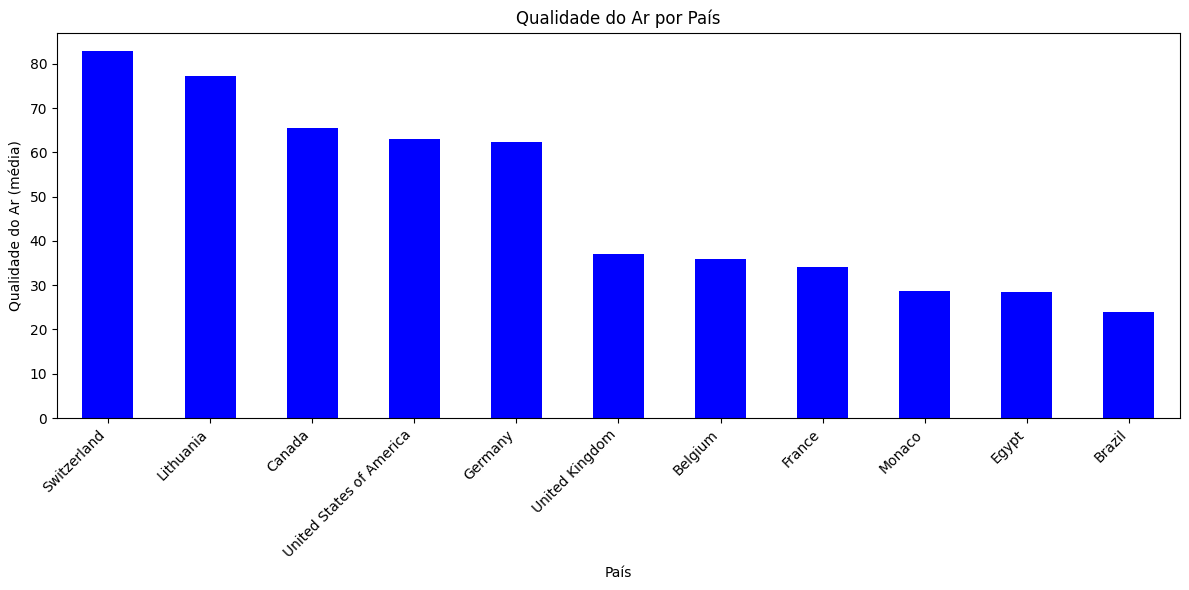

In [19]:
# Primeiro calculamos a média da qualidade do ar por país
media_ar = df.groupby('Country')['AirQuality'].mean()

# Depois ordenamos os países por ordem decrescente de qualidade do ar
media_ar = media_ar.sort_values(ascending=False)

# E por fim criamos o gráfico
plt.figure(figsize=(12, 6))
media_ar.plot(kind='bar', color = 'blue')
plt.title('Qualidade do Ar por País')
plt.xlabel('País')
plt.ylabel('Qualidade do Ar (média)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

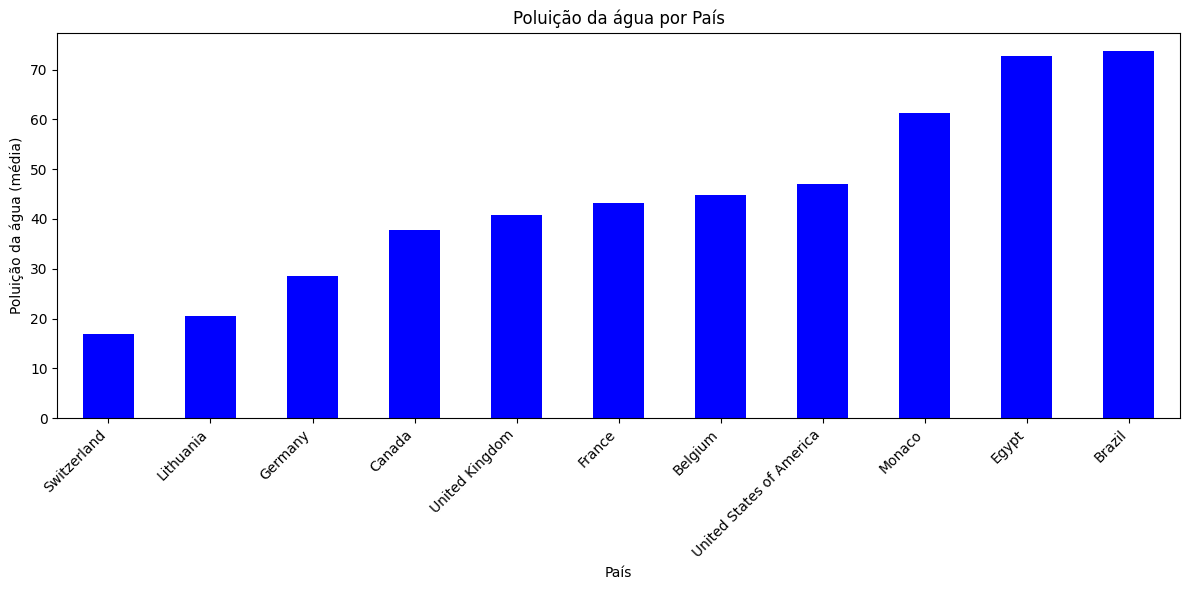

In [22]:
# Agora repetimos o mesmo processo acima para a poluição da água
media_agua = df.groupby('Country')['WaterPollution'].mean()

media_agua = media_agua.sort_values(ascending=True)

plt.figure(figsize=(12, 6))
media_agua.plot(kind='bar', color = 'blue')
plt.title('Poluição da água por País')
plt.xlabel('País')
plt.ylabel('Poluição da água (média)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

               City                Region                   Country  \
0     New York City              New York  United States of America   
1  Washington, D.C.  District of Columbia  United States of America   
2     San Francisco            California  United States of America   
3            Berlin                   NaN                   Germany   
4       Los Angeles            California  United States of America   

   AirQuality  WaterPollution  Média Qualidade  
0   46.816038       49.504950        48.160494  
1   66.129032       49.107143        57.618088  
2   60.514019       43.000000        51.757009  
3   62.364130       28.612717        45.488424  
4   36.621622       61.299435        48.960528  


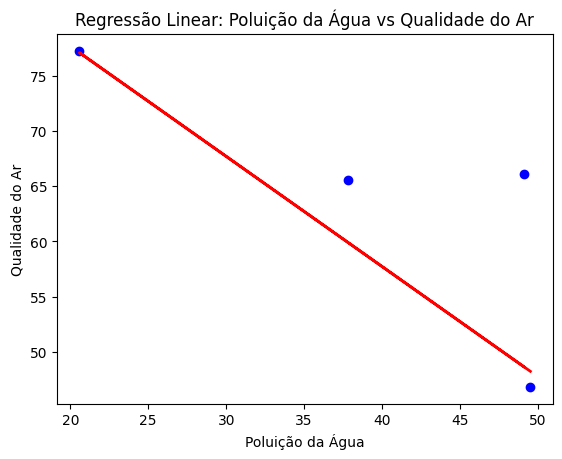

In [31]:
# Verificar os primeiros registros para entender a estrutura dos dados
print(df.head())

# Dividir os dados em variáveis independentes (X) e variável dependente (y)
X = df[['WaterPollution']]
y = df['AirQuality']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar um objeto de regressão linear
regression = LinearRegression()

# Treinar o modelo usando os dados de treinamento
regression.fit(X_train, y_train)

# Fazer previsões usando os dados de teste
y_pred = regression.predict(X_test)

# Visualizar os resultados
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Poluição da Água')
plt.ylabel('Qualidade do Ar')
plt.title('Regressão Linear: Poluição da Água vs Qualidade do Ar')
plt.show()

In [21]:
# Cálculo da média da qualidade do ar e poluição da água por cidade
df['Média Qualidade'] = (df['AirQuality'] + df['WaterPollution']) / 2

# Ordenação das cidades com base na média da qualidade
melhores_cidades = df.sort_values(by='Média Qualidade')
piores_cidades = df.sort_values(by='Média Qualidade', ascending=False)

# Exibição das cidades com as piores e melhores médias
pior_cidade = melhores_cidades.iloc[0]
melhor_cidade = piores_cidades.iloc[0]

print("Pior cidade:")
print(pior_cidade['City'])
print("Média Qualidade:", pior_cidade['Média Qualidade'])

print("\nMelhor cidade:")
print(melhor_cidade['City'])
print("Média Qualidade:", melhor_cidade['Média Qualidade'])

Pior cidade:
Paris
Média Qualidade: 38.57304168

Melhor cidade:
Alexandria
Média Qualidade: 67.608173075
